In [1]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf


/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist.train.images.shape

(55000, 784)

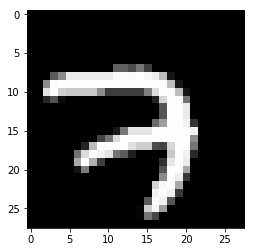

In [4]:
plt.imshow(Image.fromarray((mnist.train.images[0]*255).astype(np.uint8).reshape([28,28])))

In [5]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [6]:
batch_images,batch_labels=mnist.train.next_batch(32)   #返回一个小批量样本的i+l

In [7]:
with tf.Graph().as_default() as g:
    inputs=tf.placeholder(shape=[None,784],dtype=tf.float32)    #none在这里代表的是32，喂进去数据的个数
    labels=tf.placeholder(shape=[None,10],dtype=tf.float32)     #占位符的shape可以写none

    #初始化链接权重创建输入输出两层之间
    out_weight=tf.Variable(tf.random_normal([784,10]))#784行，10列
    out_bias=tf.Variable(tf.zeros([10, ]))
    #输出层的求和(输入)
    logits=tf.matmul(inputs,out_weight)+out_bias
    #zuizhongshuchu
    output=tf.nn.softmax(logits)         #shape=[None,10]
    
    
    #dingyijiaochashangdaijiahanshu
    loss=tf.reduce_mean(-tf.reduce_sum(labels * tf.log(output+1e-17),axis=1))        
    #1e-17为了防止溢出
    
    
    #正确率衡量准确性
    acc=tf.reduce_mean(
        tf.cast(
        tf.equal( tf.argmax(output,axis=1) ,tf.argmax(labels,axis=1) )  #比较输出和标记是否相等
        ,tf.float32)#把返回值转为float32类型
    )#reduce_mean会把所有的都加起来求和
    #定义优化器
    optin=tf.train.GradientDescentOptimizer(learning_rate=0.01)
    #最小化代价
    train_op=optin.minimize(loss)

In [10]:
#chuangjianyige huihua yunxing tu
with tf.Session(graph=g) as sess:
    #初始化变量
    sess.run(tf.global_variables_initializer())
    
    #训练
    #定义训练循环
    for i  in range(10000):
        batch_images,batch_labels=mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
       # res_loss, _ =sess.run([loss,train_op], feed_dict{inputs:batch_images,
         #                            labels:batch_labels
           #                         })  #用res——loss盛返回值loss 其他是训练
#
        if i %500 ==0:
            #记录所有的正确率，最后求平均
            accs=[]
            #用测试集算正确率
        
            for j in range(10000 //32):
                batch_images,batcg_labels=  mnist.test.next_batch(32)
                res_acc=sess.run(acc, feed_dict={inputs:batch_images
                                         ,labels:batch_labels})
                accs.append(res_acc)
            
                m_acc=np.mean(accs)
        
                print("loss %2.4f, acc%2.2f"% (res_loss, m_acc*100))
        
              
    

loss 13.7493, acc12.50
loss 13.7493, acc9.38
loss 13.7493, acc8.33
loss 13.7493, acc7.03
loss 13.7493, acc6.88
loss 13.7493, acc7.81
loss 13.7493, acc8.93
loss 13.7493, acc9.38
loss 13.7493, acc9.72
loss 13.7493, acc10.00
loss 13.7493, acc10.80
loss 13.7493, acc10.42
loss 13.7493, acc9.86
loss 13.7493, acc10.49
loss 13.7493, acc11.04
loss 13.7493, acc11.13
loss 13.7493, acc11.40
loss 13.7493, acc11.63
loss 13.7493, acc11.18
loss 13.7493, acc11.56
loss 13.7493, acc11.46
loss 13.7493, acc12.07
loss 13.7493, acc12.09
loss 13.7493, acc12.11
loss 13.7493, acc12.00
loss 13.7493, acc11.90
loss 13.7493, acc11.81
loss 13.7493, acc11.72
loss 13.7493, acc11.64
loss 13.7493, acc11.46
loss 13.7493, acc11.29
loss 13.7493, acc11.82
loss 13.7493, acc11.74
loss 13.7493, acc11.86
loss 13.7493, acc11.70
loss 13.7493, acc11.98
loss 13.7493, acc11.99
loss 13.7493, acc12.09
loss 13.7493, acc12.18
loss 13.7493, acc12.27
loss 13.7493, acc12.20
loss 13.7493, acc12.13
loss 13.7493, acc12.14
loss 13.7493, acc12.

loss 2.9847, acc6.25
loss 2.9847, acc7.81
loss 2.9847, acc8.33
loss 2.9847, acc7.81
loss 2.9847, acc8.75
loss 2.9847, acc8.33
loss 2.9847, acc7.59
loss 2.9847, acc7.42
loss 2.9847, acc7.64
loss 2.9847, acc7.81
loss 2.9847, acc7.67
loss 2.9847, acc7.55
loss 2.9847, acc6.97
loss 2.9847, acc7.37
loss 2.9847, acc7.08
loss 2.9847, acc7.03
loss 2.9847, acc7.17
loss 2.9847, acc7.47
loss 2.9847, acc7.40
loss 2.9847, acc7.19
loss 2.9847, acc6.99
loss 2.9847, acc6.82
loss 2.9847, acc6.93
loss 2.9847, acc6.90
loss 2.9847, acc6.88
loss 2.9847, acc6.97
loss 2.9847, acc7.06
loss 2.9847, acc7.25
loss 2.9847, acc7.22
loss 2.9847, acc7.40
loss 2.9847, acc7.46
loss 2.9847, acc7.91
loss 2.9847, acc7.86
loss 2.9847, acc7.81
loss 2.9847, acc7.77
loss 2.9847, acc7.90
loss 2.9847, acc7.85
loss 2.9847, acc7.89
loss 2.9847, acc7.85
loss 2.9847, acc7.81
loss 2.9847, acc7.70
loss 2.9847, acc7.81
loss 2.9847, acc8.07
loss 2.9847, acc7.95
loss 2.9847, acc7.99
loss 2.9847, acc7.95
loss 2.9847, acc8.18
loss 2.9847, 

loss 1.1336, acc12.50
loss 1.1336, acc10.94
loss 1.1336, acc14.58
loss 1.1336, acc13.28
loss 1.1336, acc10.63
loss 1.1336, acc10.42
loss 1.1336, acc10.27
loss 1.1336, acc9.77
loss 1.1336, acc10.07
loss 1.1336, acc10.00
loss 1.1336, acc9.38
loss 1.1336, acc9.90
loss 1.1336, acc10.10
loss 1.1336, acc9.60
loss 1.1336, acc9.38
loss 1.1336, acc9.38
loss 1.1336, acc9.19
loss 1.1336, acc9.55
loss 1.1336, acc9.87
loss 1.1336, acc9.53
loss 1.1336, acc9.23
loss 1.1336, acc9.23
loss 1.1336, acc9.38
loss 1.1336, acc9.51
loss 1.1336, acc9.62
loss 1.1336, acc9.25
loss 1.1336, acc9.26
loss 1.1336, acc9.26
loss 1.1336, acc9.27
loss 1.1336, acc9.48
loss 1.1336, acc9.68
loss 1.1336, acc9.77
loss 1.1336, acc9.75
loss 1.1336, acc9.65
loss 1.1336, acc9.73
loss 1.1336, acc9.72
loss 1.1336, acc9.88
loss 1.1336, acc10.03
loss 1.1336, acc9.78
loss 1.1336, acc10.23
loss 1.1336, acc10.06
loss 1.1336, acc9.90
loss 1.1336, acc9.74
loss 1.1336, acc9.87
loss 1.1336, acc10.28
loss 1.1336, acc10.26
loss 1.1336, acc10.

loss 0.9546, acc21.88
loss 0.9546, acc20.31
loss 0.9546, acc19.79
loss 0.9546, acc16.41
loss 0.9546, acc13.12
loss 0.9546, acc11.46
loss 0.9546, acc10.71
loss 0.9546, acc11.33
loss 0.9546, acc11.46
loss 0.9546, acc10.31
loss 0.9546, acc10.51
loss 0.9546, acc10.94
loss 0.9546, acc11.30
loss 0.9546, acc10.71
loss 0.9546, acc10.42
loss 0.9546, acc9.96
loss 0.9546, acc9.56
loss 0.9546, acc9.55
loss 0.9546, acc9.38
loss 0.9546, acc9.69
loss 0.9546, acc9.67
loss 0.9546, acc9.80
loss 0.9546, acc9.38
loss 0.9546, acc9.38
loss 0.9546, acc9.38
loss 0.9546, acc9.38
loss 0.9546, acc9.38
loss 0.9546, acc9.60
loss 0.9546, acc9.48
loss 0.9546, acc9.27
loss 0.9546, acc9.17
loss 0.9546, acc8.98
loss 0.9546, acc9.00
loss 0.9546, acc8.92
loss 0.9546, acc9.11
loss 0.9546, acc9.11
loss 0.9546, acc9.04
loss 0.9546, acc8.88
loss 0.9546, acc8.89
loss 0.9546, acc8.83
loss 0.9546, acc8.77
loss 0.9546, acc8.85
loss 0.9546, acc8.72
loss 0.9546, acc8.81
loss 0.9546, acc8.75
loss 0.9546, acc8.76
loss 0.9546, acc8.8

loss 1.0655, acc9.38
loss 1.0655, acc17.19
loss 1.0655, acc17.71
loss 1.0655, acc14.84
loss 1.0655, acc13.12
loss 1.0655, acc11.46
loss 1.0655, acc12.05
loss 1.0655, acc11.72
loss 1.0655, acc11.11
loss 1.0655, acc10.31
loss 1.0655, acc10.51
loss 1.0655, acc10.68
loss 1.0655, acc10.10
loss 1.0655, acc10.04
loss 1.0655, acc10.21
loss 1.0655, acc9.96
loss 1.0655, acc10.29
loss 1.0655, acc10.24
loss 1.0655, acc10.20
loss 1.0655, acc10.00
loss 1.0655, acc9.82
loss 1.0655, acc9.66
loss 1.0655, acc9.51
loss 1.0655, acc9.64
loss 1.0655, acc9.75
loss 1.0655, acc9.62
loss 1.0655, acc9.61
loss 1.0655, acc9.49
loss 1.0655, acc9.81
loss 1.0655, acc9.69
loss 1.0655, acc9.68
loss 1.0655, acc10.06
loss 1.0655, acc9.94
loss 1.0655, acc9.93
loss 1.0655, acc10.18
loss 1.0655, acc10.16
loss 1.0655, acc10.05
loss 1.0655, acc9.95
loss 1.0655, acc10.10
loss 1.0655, acc10.23
loss 1.0655, acc10.37
loss 1.0655, acc10.34
loss 1.0655, acc10.10
loss 1.0655, acc10.16
loss 1.0655, acc10.14
loss 1.0655, acc10.05
loss

loss 0.2868, acc3.12
loss 0.2868, acc6.25
loss 0.2868, acc7.29
loss 0.2868, acc6.25
loss 0.2868, acc6.88
loss 0.2868, acc7.29
loss 0.2868, acc6.70
loss 0.2868, acc7.42
loss 0.2868, acc8.68
loss 0.2868, acc8.44
loss 0.2868, acc8.52
loss 0.2868, acc8.33
loss 0.2868, acc8.41
loss 0.2868, acc8.71
loss 0.2868, acc8.54
loss 0.2868, acc8.40
loss 0.2868, acc8.82
loss 0.2868, acc9.20
loss 0.2868, acc9.21
loss 0.2868, acc9.38
loss 0.2868, acc9.38
loss 0.2868, acc9.80
loss 0.2868, acc9.65
loss 0.2868, acc9.64
loss 0.2868, acc9.88
loss 0.2868, acc9.98
loss 0.2868, acc9.95
loss 0.2868, acc9.71
loss 0.2868, acc9.48
loss 0.2868, acc9.69
loss 0.2868, acc9.68
loss 0.2868, acc9.57
loss 0.2868, acc9.38
loss 0.2868, acc9.47
loss 0.2868, acc9.46
loss 0.2868, acc9.46
loss 0.2868, acc9.54
loss 0.2868, acc9.79
loss 0.2868, acc10.02
loss 0.2868, acc10.00
loss 0.2868, acc10.06
loss 0.2868, acc10.04
loss 0.2868, acc10.03
loss 0.2868, acc10.09
loss 0.2868, acc10.14
loss 0.2868, acc10.26
loss 0.2868, acc10.17
loss

loss 1.9645, acc12.50
loss 1.9645, acc7.81
loss 1.9645, acc8.33
loss 1.9645, acc8.59
loss 1.9645, acc9.38
loss 1.9645, acc9.90
loss 1.9645, acc9.82
loss 1.9645, acc8.98
loss 1.9645, acc8.68
loss 1.9645, acc8.75
loss 1.9645, acc8.81
loss 1.9645, acc8.59
loss 1.9645, acc8.41
loss 1.9645, acc8.48
loss 1.9645, acc8.75
loss 1.9645, acc8.20
loss 1.9645, acc8.46
loss 1.9645, acc8.51
loss 1.9645, acc8.55
loss 1.9645, acc8.28
loss 1.9645, acc8.48
loss 1.9645, acc8.38
loss 1.9645, acc8.29
loss 1.9645, acc8.72
loss 1.9645, acc8.75
loss 1.9645, acc8.65
loss 1.9645, acc8.68
loss 1.9645, acc8.71
loss 1.9645, acc8.84
loss 1.9645, acc9.06
loss 1.9645, acc9.38
loss 1.9645, acc9.57
loss 1.9645, acc9.85
loss 1.9645, acc9.83
loss 1.9645, acc10.00
loss 1.9645, acc9.72
loss 1.9645, acc9.80
loss 1.9645, acc9.54
loss 1.9645, acc9.54
loss 1.9645, acc9.69
loss 1.9645, acc9.60
loss 1.9645, acc9.60
loss 1.9645, acc9.59
loss 1.9645, acc9.59
loss 1.9645, acc9.51
loss 1.9645, acc9.65
loss 1.9645, acc9.57
loss 1.9645

loss 0.9970, acc9.38
loss 0.9970, acc14.06
loss 0.9970, acc11.46
loss 0.9970, acc10.94
loss 0.9970, acc11.25
loss 0.9970, acc11.46
loss 0.9970, acc13.84
loss 0.9970, acc14.45
loss 0.9970, acc14.24
loss 0.9970, acc13.75
loss 0.9970, acc13.64
loss 0.9970, acc13.54
loss 0.9970, acc13.46
loss 0.9970, acc13.17
loss 0.9970, acc12.92
loss 0.9970, acc12.50
loss 0.9970, acc12.13
loss 0.9970, acc12.33
loss 0.9970, acc12.50
loss 0.9970, acc12.66
loss 0.9970, acc12.50
loss 0.9970, acc12.36
loss 0.9970, acc12.09
loss 0.9970, acc11.72
loss 0.9970, acc11.87
loss 0.9970, acc11.90
loss 0.9970, acc11.69
loss 0.9970, acc11.50
loss 0.9970, acc11.42
loss 0.9970, acc11.25
loss 0.9970, acc11.29
loss 0.9970, acc11.13
loss 0.9970, acc11.36
loss 0.9970, acc11.12
loss 0.9970, acc11.16
loss 0.9970, acc10.94
loss 0.9970, acc10.90
loss 0.9970, acc10.94
loss 0.9970, acc10.90
loss 0.9970, acc10.70
loss 0.9970, acc10.82
loss 0.9970, acc10.71
loss 0.9970, acc10.76
loss 0.9970, acc10.65
loss 0.9970, acc10.69
loss 0.9970

loss 0.8089, acc3.12
loss 0.8089, acc4.69
loss 0.8089, acc7.29
loss 0.8089, acc8.59
loss 0.8089, acc8.75
loss 0.8089, acc9.38
loss 0.8089, acc8.48
loss 0.8089, acc8.20
loss 0.8089, acc8.68
loss 0.8089, acc8.75
loss 0.8089, acc9.09
loss 0.8089, acc10.16
loss 0.8089, acc10.10
loss 0.8089, acc10.94
loss 0.8089, acc11.04
loss 0.8089, acc11.13
loss 0.8089, acc11.21
loss 0.8089, acc11.11
loss 0.8089, acc11.51
loss 0.8089, acc11.56
loss 0.8089, acc11.46
loss 0.8089, acc11.51
loss 0.8089, acc11.68
loss 0.8089, acc11.20
loss 0.8089, acc11.12
loss 0.8089, acc11.18
loss 0.8089, acc11.11
loss 0.8089, acc10.94
loss 0.8089, acc10.78
loss 0.8089, acc10.73
loss 0.8089, acc10.69
loss 0.8089, acc10.45
loss 0.8089, acc10.42
loss 0.8089, acc10.39
loss 0.8089, acc10.80
loss 0.8089, acc10.68
loss 0.8089, acc10.64
loss 0.8089, acc10.77
loss 0.8089, acc10.66
loss 0.8089, acc10.55
loss 0.8089, acc10.44
loss 0.8089, acc10.27
loss 0.8089, acc10.25
loss 0.8089, acc10.37
loss 0.8089, acc10.28
loss 0.8089, acc10.26

loss 1.0772, acc6.25
loss 1.0772, acc4.69
loss 1.0772, acc6.25
loss 1.0772, acc7.03
loss 1.0772, acc6.88
loss 1.0772, acc7.29
loss 1.0772, acc7.14
loss 1.0772, acc7.81
loss 1.0772, acc8.33
loss 1.0772, acc7.81
loss 1.0772, acc8.52
loss 1.0772, acc8.59
loss 1.0772, acc8.17
loss 1.0772, acc8.26
loss 1.0772, acc8.12
loss 1.0772, acc8.20
loss 1.0772, acc8.27
loss 1.0772, acc8.33
loss 1.0772, acc8.39
loss 1.0772, acc8.44
loss 1.0772, acc8.63
loss 1.0772, acc8.66
loss 1.0772, acc8.56
loss 1.0772, acc8.59
loss 1.0772, acc8.62
loss 1.0772, acc8.65
loss 1.0772, acc8.45
loss 1.0772, acc8.26
loss 1.0772, acc8.30
loss 1.0772, acc8.12
loss 1.0772, acc8.17
loss 1.0772, acc8.50
loss 1.0772, acc8.24
loss 1.0772, acc8.18
loss 1.0772, acc8.04
loss 1.0772, acc8.07
loss 1.0772, acc8.19
loss 1.0772, acc8.63
loss 1.0772, acc8.65
loss 1.0772, acc8.98
loss 1.0772, acc9.15
loss 1.0772, acc9.30
loss 1.0772, acc9.30
loss 1.0772, acc9.38
loss 1.0772, acc9.31
loss 1.0772, acc9.17
loss 1.0772, acc9.04
loss 1.0772, 

In [ ]:
#代价函数优化写法
tf.keras.losses.binary_crossentropy()

In [ ]:
#创建网络层优化
tf.keras.layers.Dense(神经元数，activation=要使用的激活函数)（当前层的输入名字）